## [Фигурные и геометрические объекты](https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html)

Эти материалы частично основаны на [Shapely-documentation](https://shapely.readthedocs.io/en/stable/manual.html) и [Westra E. (2013), Глава 3](https://www.packtpub.com/application-development/python-geospatial-development-second-edition).

### Модель пространственных данных

![](img/SpatialDataModel.PNG)
Фундаментальные геометрические объекты, которые могут быть использованы в Python с [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

Наиболее фундаментальными являются геометрические объекты Points, LinesPolygons которые и являются основными составляющими при работе с пространственными данными в векторном формате. Python имеет специальный модуль под названием [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) для выполнения различных геометрических операций. Базовые знания об использовании Shapely являются фундаментальными для понимания того, как геометрия хранится и обрабатывается в GeoPandas.

##### Геометрические объекты состоят из координатных кортежей, где:

 - **Point** - объект представляет собой единую точку в пространстве. Точки могут быть как двумерными (x, y), так и трехмерными (x, y, z).

 - **LineString** - объект (то есть линия) представляет собой последовательность точек, соединенных вместе, чтобы сформировать линию. Следовательно, линия состоит из списка по крайней мере из двух координатных кортежей

 - **Polygon** - объект представляет собой заполненную область, состоящую из списка по крайней мере из трех координатных кортежей, образующих внешнее кольцо, и (возможного) списка полигонов отверстий.

##### Также возможно иметь коллекцию геометрических объектов (например, многоугольники с несколькими частями):

 - **MultiPoint** - объект представляет собой набор точек и состоит из списка координатных кортежей

 - **MultiLineString** - объект представляет собой набор линий и состоит из списка строкообразных последовательностей

 - **MultiPolygon** - объект представляет собой набор полигонов, состоящий из списка полигоноподобных последовательностей, которые строятся из внешних кольцевых и (возможных) дырочных кортежей списка

##### Полезные атрибуты и методы в Shapely включают в себя:

- Создание линий и полигонов на основе набора точечных объектов.

- Вычисление площадей / длины / границ и т. д. входных геометрий

- Проведение геометрических операций на основе входных геометрий, таких как ***union***,***difference***,***distance*** и т.д.

- Проведение пространственных запросов между геометриями, такими как ***intersects***,***touches***, и т.д. ***crosseswithin***

**Кортеж**

[Кортеж](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) - это структура данных Python, состоящая из нубера значений, разделенных запятыми. Пары координат часто представляются в виде кортежа. Например:
```
(60.192059, 24.945831)
```
Кортежи принадлежат к последовательным типам данных в Python. Другими типами данных последовательности являются списки и диапазоны. Кортежи имеют много общего со списками и диапазонами, но они часто используются для разных целей. Основное различие между кортежами и списками состоит в том , что кортежи неизменяемы, что означает, что содержимое кортежа не может быть изменено (в то время как списки изменяемы; вы можете, например, добавлять и удалять значения из списков).

In [3]:
import os
from shapely.geometry import Point, LineString, Polygon

# # Текущая директория
# ROOT_PATH = os.path.abspath(os.curdir)

### Point
Создание точки легко, вы передаете координаты x и y в Point() - объект (и возможно, также z-координату):

In [8]:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

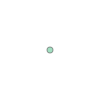

In [9]:
point1

Как мы видим здесь, Jupyter notebook способен отображать форму непосредственно на экране.

Мы можем использовать оператор print для получения информации о фактическом определении этих объектов:

In [10]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


3D-точка может быть распознана по заглавной букве Z перед координатами.

Давайте также проверим тип данных точки:

In [13]:
type(point1)

shapely.geometry.point.Point

Мы можем видеть, что тип точки-это точка Шейпли. Точечный объект представлен в определенном формате, основанном на [Библиотека GEOS C++](https://trac.osgeo.org/geos) , которая является одной из стандартных библиотек различных геоинформационных систем. Он работает под капотом, например, в [QGIS](http://www.qgis.org/en/site/).

#### Атрибуты и функции точек
Точки и другие фигурные объекты имеют полезные встроенные [атрибуты и методы](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Используя доступные атрибуты, мы можем, например, извлечь значения координат точки и вычислить евклидово расстояние между точками.

**geom_type** атрибут содержит информацию о типе геометрии объекта Shapely:

In [14]:
point1.geom_type

'Point'

Извлечение координат точки может быть выполнено несколькими различными способами:

**coords** атрибут содержит информацию о координатах, как a **CoordinateSequence** , которая является другим типом данных, связанным с Shapely.

In [21]:
print(point1.coords)
print("Координаты точки № 1:", list(point1.coords))

Координаты точки № 1: [(2.2, 4.2)]


In [24]:
# Считайте координаты x и y отдельно
x = point1.x
y = point1.y
print(x, y)

2.2 4.2


Кроме того, можно рассчитать расстояние между двумя объектами с помощью метода [distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance). В нашем примере расстояние вычисляется в декартовой системе координат. При работе с реальными данными ГИС расстояние определяется на основе используемой системы координат. Всегда проверяйте, какова единица измерения (например, метры) в используемой системе координат.

Давайте вычислим расстояние между point1 и point2:

In [25]:
# Входные данные
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [29]:
# Расстояние между точками 1 и 2
dist = point1.distance(point2)
print(dist)
# Отформатируем
print(f"Расстояние между точками 1 и 2 : {round(dist, 2)} единиц измерения")

29.723559679150142
Расстояние между точками 1 и 2 : 29.72 единиц измерения


### LineString

Создание LineString-объектов довольно похоже на создание фигурных точек.

Теперь вместо того, чтобы использовать один координатный кортеж, мы можем построить линию, используя либо список фигурных точечных объектов, либо передать точки как координатные кортежи:

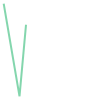

In [33]:
# Создадим линию из точек
# Список объектов
line1 = LineString([point1, point2, point3])
line1

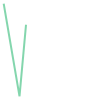

In [34]:
# Список кортежей координат
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line2

In [35]:
# Линии одинаковые
line1 == line2

True

In [36]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [37]:
type(line)

shapely.geometry.linestring.LineString

In [38]:
line.geom_type

'LineString'

#### Атрибуты и функции LineString

**LineString** - объект имеет много полезных встроенных атрибутов и функциональных возможностей. Например, можно извлечь координаты или длину линии (линии), вычислить центроид линии, создать точки вдоль линии на определенном расстоянии, вычислить ближайшее расстояние от линии до указанной точки и упростить геометрию. Смотрите полный список функций из документации [Shapely](http://toblerity.org/shapely/manual.html). Здесь мы рассмотрим некоторые из них.

Мы можем извлечь координаты LineString аналогично тому, как с помощью Point

In [42]:
print(line.coords)
print("Координаты линии:",list(line.coords))

Координаты линии: [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]


In [52]:
# Извлеките координаты x и y отдельно
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])
print(xcoords, ycoords)

[2.2, 7.2, 9.26] [4.2, -25.1, -2.456]


In [62]:
# Получить длину строки
l_length = line1.length
# Отформатируем
print(f"Длинна линии : {round(l_length, 2)} единиц измерения")

Длинна линии : 52.46 единиц измерения


In [63]:
# Получим центроид линии
print(line1.centroid)

POINT (6.229961354035622 -11.89241115757239)
